In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#lets check the shape of Dataset
df.shape

(30, 17)

In [4]:
#lets check the null values 
df.isnull().sum()
#here we can see that there are no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
#lets check the Data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
#lets check the skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [7]:
#here we can see that some values are far away from 0.55 so will replace all the values by log1
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [8]:
#lets check again by replacing log1 values
df.skew()
#now it looks perfect in case of the skewness

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

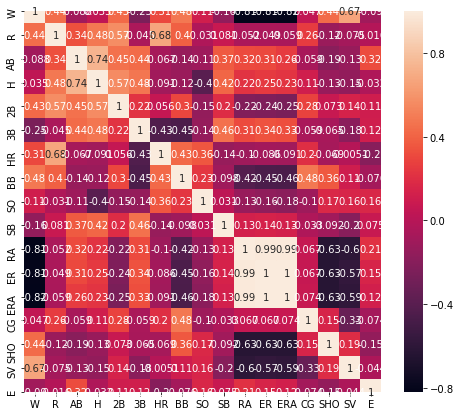

In [9]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

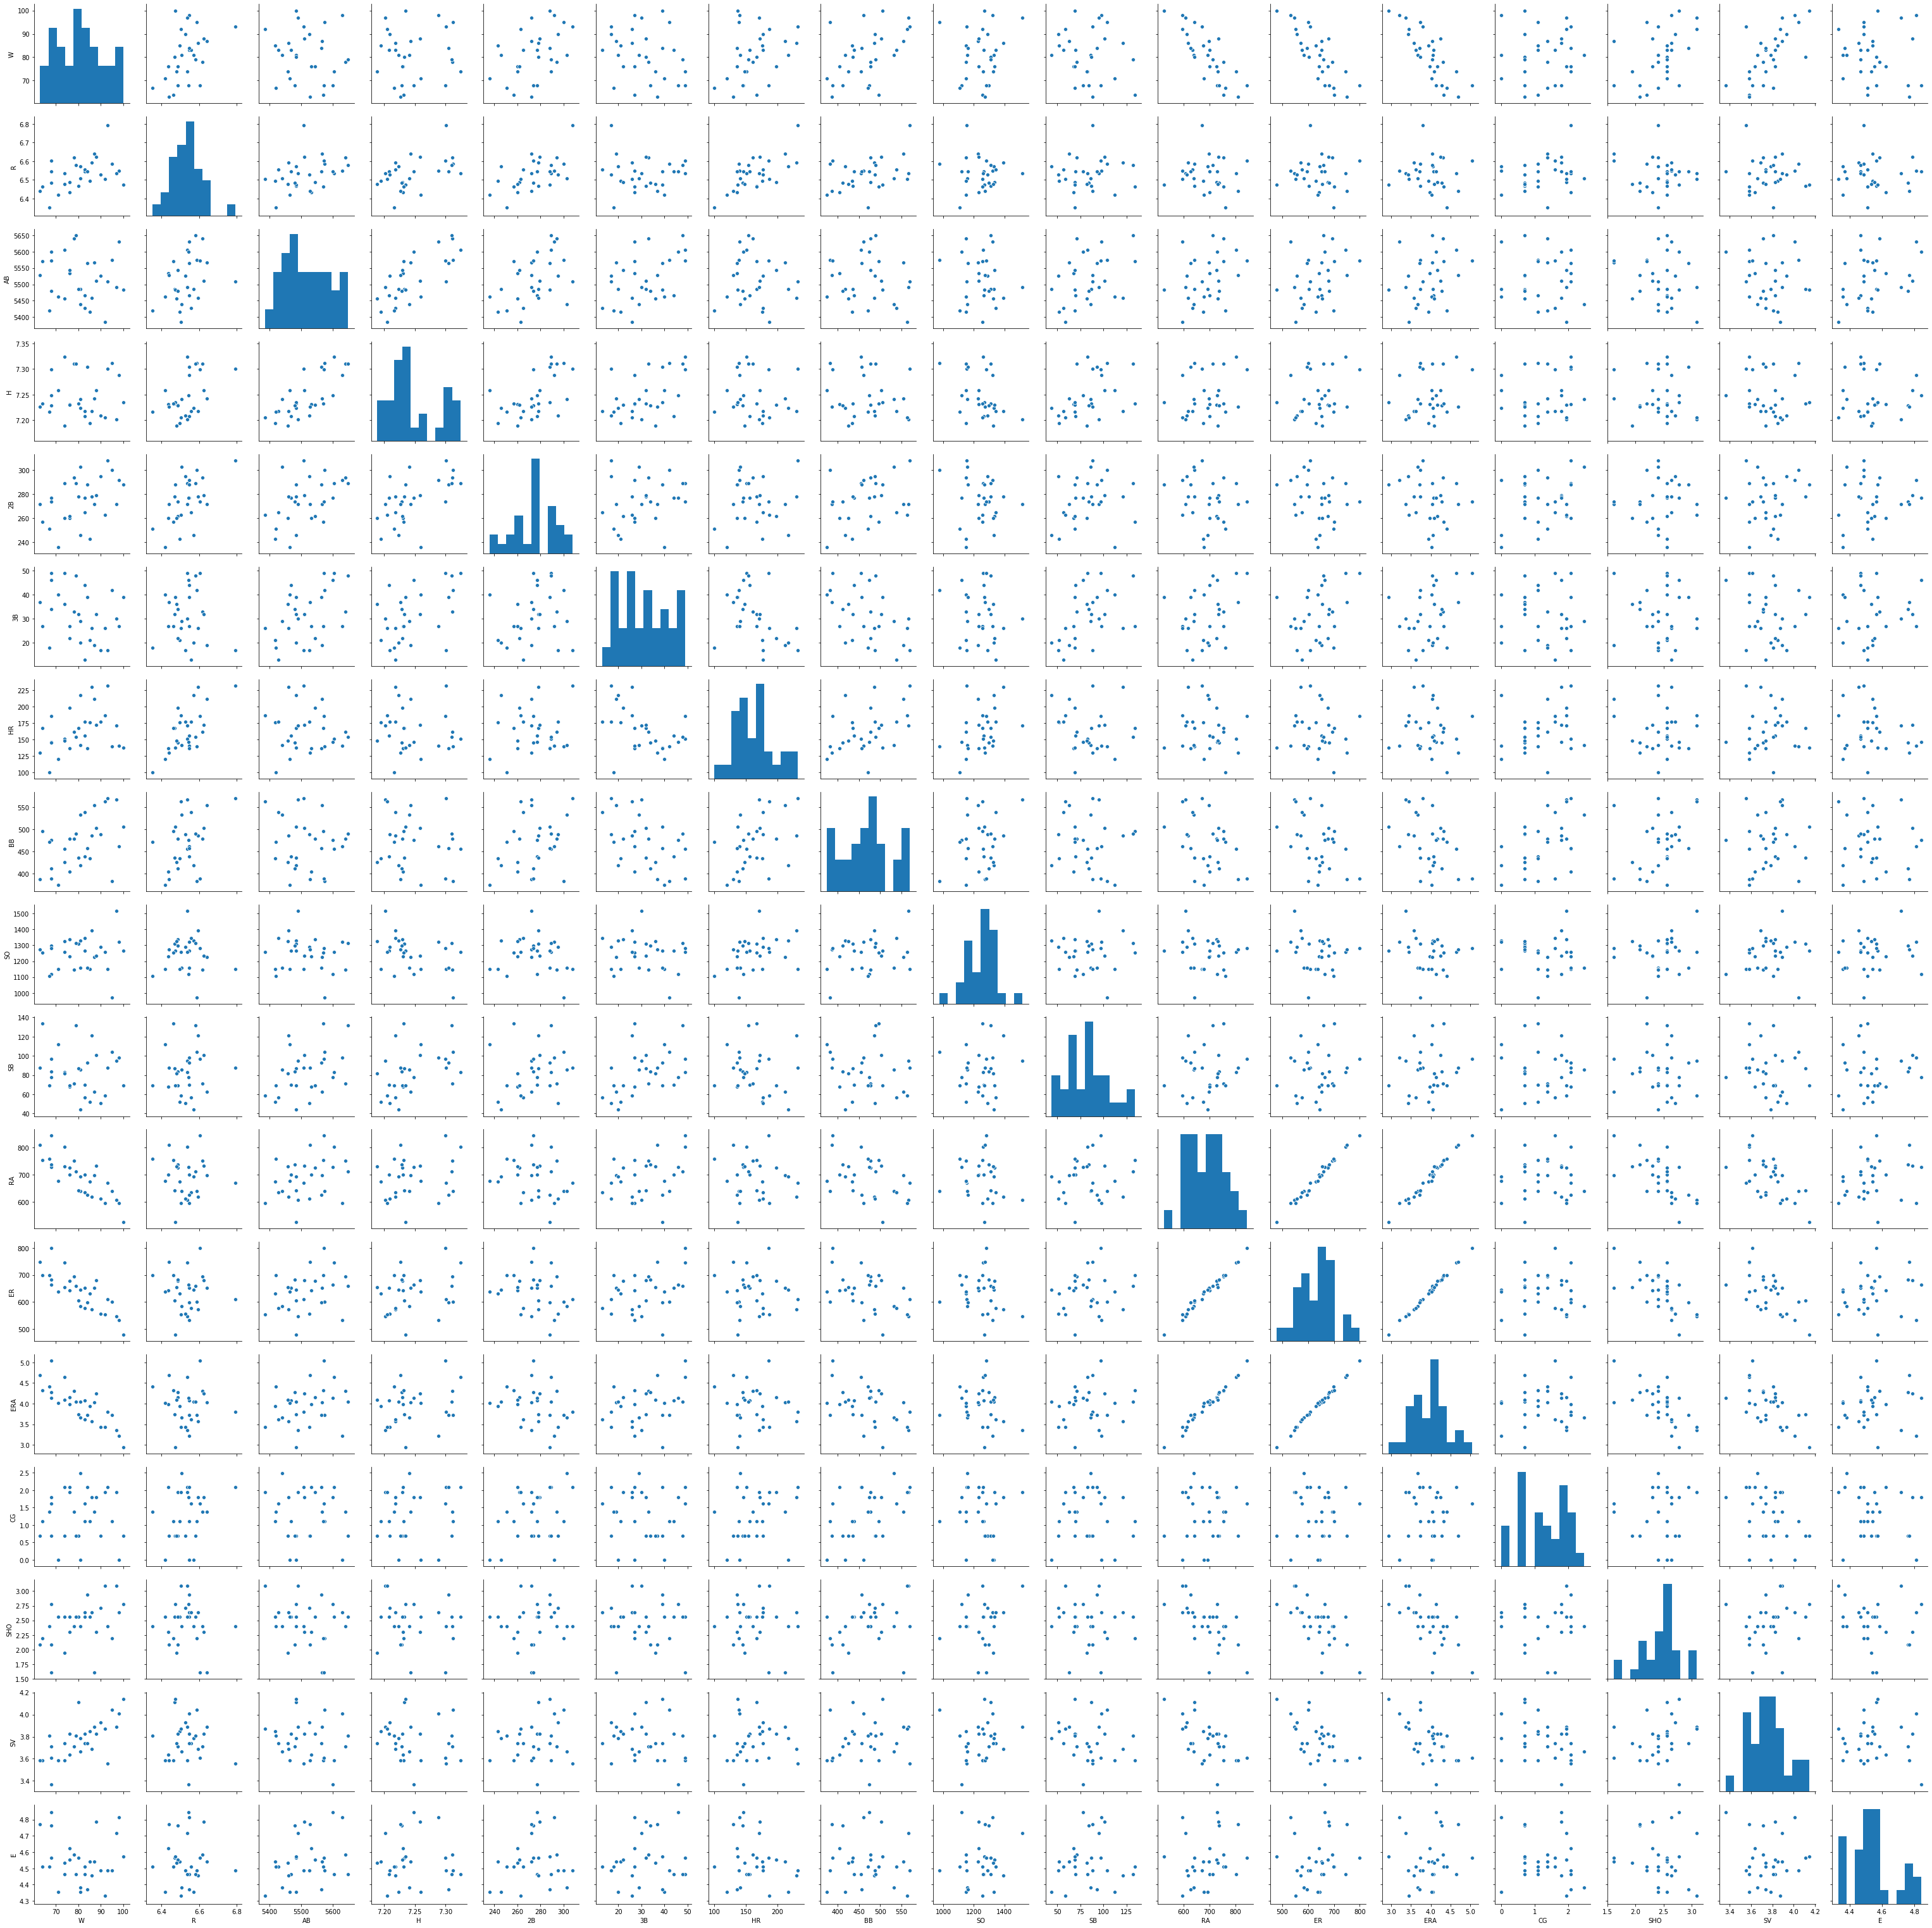

In [10]:
#lets explore some more information by using pairplot
sns.pairplot(df)
plt.show()
#here you can see the graph is actually showing a regression problem so as per the business problem 
#we are going to apply Linear regression for the prediction

In [11]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(30, 17)
(29, 17)


In [12]:
#lets separate x and y
df_x = df_final.drop(columns=["W"],axis=1)
y = df_final[["W"]]

In [13]:
#as we know that standard scaling is very much important in Regression type of model so
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [17]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
#Lets check the shape of x and y in train test split
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(23, 16) (6, 16)
(23, 1) (6, 1)


In [19]:
#lets create a function to call
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [20]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.38258594758071585
r2 score corresponding to 43 is -3.984349062629497
r2 score corresponding to 44 is 0.31639862621533676
r2 score corresponding to 45 is 0.03398425142875361
r2 score corresponding to 46 is 0.7559749334265293
r2 score corresponding to 47 is -0.3848987556105328
r2 score corresponding to 48 is -0.4795283790094309
r2 score corresponding to 49 is -0.3522434963284451
r2 score corresponding to 50 is 0.7396594059604658
r2 score corresponding to 51 is 0.6678854398794432
r2 score corresponding to 52 is 0.40910953007515394
r2 score corresponding to 53 is 0.2529900538815285
r2 score corresponding to 54 is -0.13496658617173374
r2 score corresponding to 55 is 0.7380124806405965
r2 score corresponding to 56 is 0.6885715570367452
r2 score corresponding to 57 is 0.5637948616738273
r2 score corresponding to 58 is 0.6283055633536332
r2 score corresponding to 59 is 0.6518898469541641
r2 score corresponding to 60 is 0.15856210876930255
r2 score correspondin

In [23]:
#lets go for the next models to evaluate for a better accuracy and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,10)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 4}

In [24]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=4)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.4944852941176471
r2 score corresponding to 43 is 0.29777200656096237
r2 score corresponding to 44 is 0.8235416666666666
r2 score corresponding to 45 is 0.14440433212996384
r2 score corresponding to 46 is 0.38550708085883967
r2 score corresponding to 47 is 0.6250825264084507
r2 score corresponding to 48 is 0.5756842456608812
r2 score corresponding to 49 is -0.5728755826461096
r2 score corresponding to 50 is 0.24573863636363646
r2 score corresponding to 51 is 0.6962311557788945
r2 score corresponding to 52 is 0.6380005977286312
r2 score corresponding to 53 is 0.33112244897959187
r2 score corresponding to 54 is 0.541258896797153
r2 score corresponding to 55 is 0.36735662742119257
r2 score corresponding to 56 is 0.5711890925346446
r2 score corresponding to 57 is 0.817080378250591
r2 score corresponding to 58 is 0.25529328732747814
r2 score corresponding to 59 is 0.5741558441558441
r2 score corresponding to 60 is 0.44930891992020516
r2 score corresponding t

In [25]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  -0.03557707802988994
mean standard deviation in r2 score of linear regression is  0.6104439003422012

mean r2 score of knn regression is  0.008336509563404459
mean standard deviation in r2 score of knn regression is  0.7159001199664433


In [26]:
#lets check laso regression 
from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {"alpha":[0.001,0.01,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [27]:
lsreg = Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.7147078662727926
r2 score corresponding to 43 is -0.3472023587874673
r2 score corresponding to 44 is 0.6150975025751331
r2 score corresponding to 45 is 0.19839825833429114
r2 score corresponding to 46 is 0.9236245561285299
r2 score corresponding to 47 is 0.6932694672676052
r2 score corresponding to 48 is -0.0716564447420498
r2 score corresponding to 49 is -0.04441886330475642
r2 score corresponding to 50 is 0.7766381132028645
r2 score corresponding to 51 is 0.6783721909324267
r2 score corresponding to 52 is 0.4930984368478485
r2 score corresponding to 53 is 0.3962613670809392
r2 score corresponding to 54 is 0.03006996528755257
r2 score corresponding to 55 is 0.7593625032282043
r2 score corresponding to 56 is 0.6530068426605553
r2 score corresponding to 57 is 0.6989871066884012
r2 score corresponding to 58 is 0.6329748853658137
r2 score corresponding to 59 is 0.6520332355145086
r2 score corresponding to 60 is 0.3619809705234628
r2 score corresponding to

In [28]:
print("mean r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of Lasso regression is  0.31201859663848464
mean standard deviation in r2 score of Lasso regression is  0.4968291607783587



In [29]:
#now we will try to use gradiant boosting techniques
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

In [30]:
gbr = GradientBoostingRegressor(learning_rate = 0.01,n_estimators=10)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.14069762573580114
r2 score corresponding to 43 is 0.048703495929638074
r2 score corresponding to 44 is 0.07003444788068158
r2 score corresponding to 45 is -0.013859346325471256
r2 score corresponding to 46 is 0.14388338294951664
r2 score corresponding to 47 is 0.09395606905693543
r2 score corresponding to 48 is 0.09590528880391747
r2 score corresponding to 49 is -2.1280200929887996
r2 score corresponding to 50 is -0.940493824192483
r2 score corresponding to 51 is 0.11054979498368511
r2 score corresponding to 52 is -0.05364441123868913
r2 score corresponding to 53 is 0.05858869429841329
r2 score corresponding to 54 is 0.06767693172219436
r2 score corresponding to 55 is 0.1088427297713922
r2 score corresponding to 56 is -0.4004120091257337
r2 score corresponding to 57 is 0.09154691156083405
r2 score corresponding to 58 is -0.24185701145475802
r2 score corresponding to 59 is -0.6109848705719052
r2 score corresponding to 60 is 0.025693965910569938
r2 score

In [31]:
gbr = GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("mean r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of gb regression is  -1.3625379189629
mean standard deviation in r2 score of gb regression is  3.6691191142718824



In [32]:
#after applying these algorithms i came to know that Linear regression model is a good one 
#So i will go ahead with Lasso regressor model 

from sklearn.externals import joblib



In [33]:
joblib.dump(lsreg, 'baseball_Model.pkl')

['baseball_Model.pkl']